In [20]:
import pickle

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import re
#import random
#from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_auc_score

import xgboost as xgb
from sklearn.metrics import auc, accuracy_score, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
#from string import ascii_letters
import seaborn as sns
import h5py as h5

import tensorflow as tf

In [42]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, InputLayer
from tensorflow.keras.callbacks import ModelCheckpoint, Callback

In [54]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


In [53]:
import tensorflow as tf
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [45]:
df = pd.read_pickle('../pickle_pd/pd_top_25.pkl')

In [46]:
df.head()

,lep_pt_2,met_et,lep_pt_1,jet_n,lep_E_1,jet_pt_0,lep_eta_0,jet_pt_1,lep_pt_0,lep_E_2,...,jet_m,lep_E_0,jet_eta_1,jet_pt_2,lep_pt_3,jet_E_0,lep_charge_1,lep_charge_0,lep_E_3,label
0,8604.807617,34466.183594,36824.394531,0.0,37284.203125,0.000000,-0.665586,0.0,58844.101562,8606.623047,...,4666.577148,72366.562500,0.0,0.0,0.000000,0.000000,-1.0,1.0,0.000000,0
1,0.000000,13054.372070,32843.285156,0.0,33086.371094,0.000000,0.461765,0.0,50064.492188,0.000000,...,4666.577148,55497.660156,0.0,0.0,0.000000,0.000000,-1.0,1.0,0.000000,0
2,14819.154297,14494.322266,43711.828125,1.0,54970.597656,34171.484375,1.684675,0.0,45343.480469,27666.873047,...,5185.404785,126422.304688,0.0,0.0,10125.891602,78158.171875,-1.0,1.0,10297.296875,0
3,22682.914062,16763.203125,27512.105469,0.0,77148.039062,0.000000,-0.030784,0.0,28012.630859,30668.925781,...,5185.404785,28025.904297,0.0,0.0,13098.041992,0.000000,1.0,-1.0,14539.251953,0
4,0.000000,78260.984375,0.000000,1.0,0.000000,199608.000000,-0.026822,0.0,74441.789062,0.000000,...,23130.806641,74468.570312,0.0,0.0,0.000000,249863.078125,0.0,1.0,0.000000,0


In [47]:
y = df.pop('label')

In [48]:
def create_model(units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(units=units, activation=activation, input_dim=input_dim))
    model.add(Dense(units=units, activation=activation))
    model.add(Dense(units=output_dim, activation='softmax'))
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

In [49]:
param_grid = {
    'units': [32, 64, 128],
    'activation': ['relu', 'sigmoid'],
    'optimizer': ['adam', 'rmsprop']
}

In [56]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_one_hot = tf.keras.utils.to_categorical(y_encoded)

# Shuffle and split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(df, y_one_hot, test_size=0.2, random_state=42)


In [57]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [61]:
X_train.shape

(416564, 25)

In [64]:
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=25))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               3328      
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 3)                 195       
                                                                 
Total params: 11779 (46.01 KB)
Trainable params: 11779 (46.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [76]:
history2 = model.fit(X_train, y_train, batch_size=512, epochs=50, verbose=1, validation_data=(X_test, y_test))

Epoch 1/50
814/814 [==============================] - 1s 831us/step - loss: 0.3181 - accuracy: 0.8744 - val_loss: 0.3239 - val_accuracy: 0.8730
Epoch 2/50
814/814 [==============================] - 1s 810us/step - loss: 0.3183 - accuracy: 0.8744 - val_loss: 0.3268 - val_accuracy: 0.8725
Epoch 3/50
814/814 [==============================] - 1s 928us/step - loss: 0.3180 - accuracy: 0.8747 - val_loss: 0.3210 - val_accuracy: 0.8739
Epoch 4/50
814/814 [==============================] - 1s 1ms/step - loss: 0.3176 - accuracy: 0.8749 - val_loss: 0.3209 - val_accuracy: 0.8740
Epoch 5/50
814/814 [==============================] - 1s 1ms/step - loss: 0.3177 - accuracy: 0.8746 - val_loss: 0.3200 - val_accuracy: 0.8747
Epoch 6/50
814/814 [==============================] - 1s 957us/step - loss: 0.3173 - accuracy: 0.8747 - val_loss: 0.3237 - val_accuracy: 0.8725
Epoch 7/50
814/814 [==============================] - 1s 815us/step - loss: 0.3173 - accuracy: 0.8748 - val_loss: 0.3200 - val_accuracy: 0.8

In [73]:
def plot_history(network_history):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.plot(network_history.history['loss'])
    plt.plot(network_history.history['val_loss'])
    plt.legend(['Training', 'Validation'])

    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.plot(network_history.history['accuracy'])
    plt.plot(network_history.history['val_accuracy'])
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()

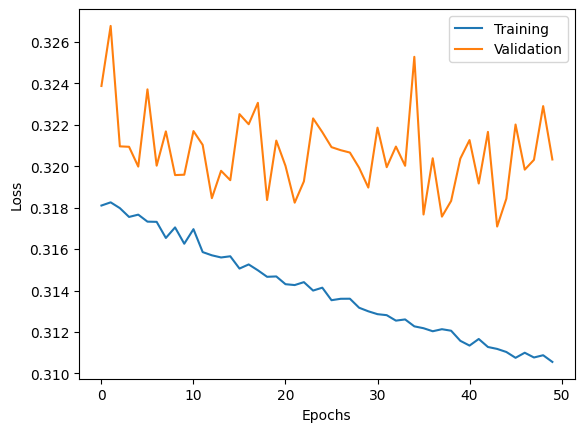

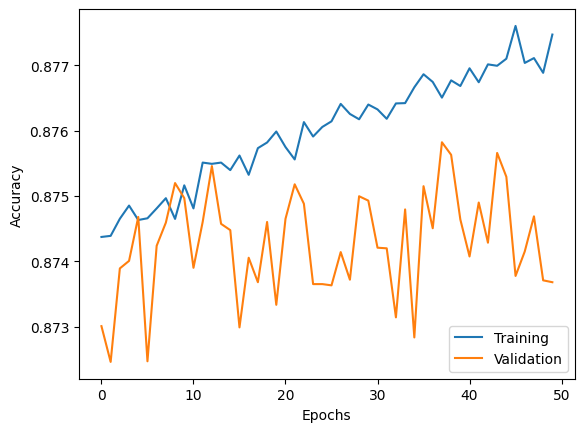

In [77]:
plot_history(history2)

In [21]:
tensor_features = tf.convert_to_tensor(df)

In [38]:
tensor_features

<tf.Tensor: shape=(520706, 25), dtype=float32, numpy=
array([[ 8.6048076e+03,  3.4466184e+04,  3.6824395e+04, ...,
        -1.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.3054372e+04,  3.2843285e+04, ...,
        -1.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 1.4819154e+04,  1.4494322e+04,  4.3711828e+04, ...,
        -1.0000000e+00,  1.0000000e+00,  1.0297297e+04],
       ...,
       [ 0.0000000e+00,  2.7180938e+05,  0.0000000e+00, ...,
         0.0000000e+00, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  9.7783766e+04,  0.0000000e+00, ...,
         0.0000000e+00, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  3.2405881e+05,  0.0000000e+00, ...,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00]], dtype=float32)>

In [39]:
normalizer = tf.keras.layers.Normalization(axis=-1)
normalizer.adapt(tensor_features)

In [40]:
tensor_features

<tf.Tensor: shape=(520706, 25), dtype=float32, numpy=
array([[ 8.6048076e+03,  3.4466184e+04,  3.6824395e+04, ...,
        -1.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  1.3054372e+04,  3.2843285e+04, ...,
        -1.0000000e+00,  1.0000000e+00,  0.0000000e+00],
       [ 1.4819154e+04,  1.4494322e+04,  4.3711828e+04, ...,
        -1.0000000e+00,  1.0000000e+00,  1.0297297e+04],
       ...,
       [ 0.0000000e+00,  2.7180938e+05,  0.0000000e+00, ...,
         0.0000000e+00, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  9.7783766e+04,  0.0000000e+00, ...,
         0.0000000e+00, -1.0000000e+00,  0.0000000e+00],
       [ 0.0000000e+00,  3.2405881e+05,  0.0000000e+00, ...,
         0.0000000e+00,  1.0000000e+00,  0.0000000e+00]], dtype=float32)>

In [41]:
normalizer(tensor_features.iloc[:3])

AttributeError: 'tensorflow.python.framework.ops.EagerTensor' object has no attribute 'iloc'

In [32]:
for i in (normed_features):
    print(i)

TypeError: 'NoneType' object is not iterable